In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,Gaiking II,2011


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [12]:
m = titles.title.value_counts()
m[0:10]

Hamlet                  20
Carmen                  17
Macbeth                 15
The Outsider            12
Maya                    12
The Three Musketeers    11
Freedom                 11
Othello                 11
Anna Karenina           10
Vengeance               10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [23]:
t = titles[titles.year // 10 * 10 == 1930]
ty = t.year.value_counts()[0:3]
ty

1937    1201
1936    1142
1938    1139
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

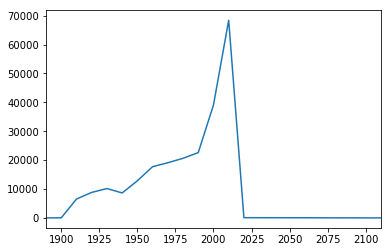

In [31]:
t = titles.year // 10 * 10
t = t.value_counts()
t.sort_index().plot()

### Plot the number of "Hamlet" films made each decade.

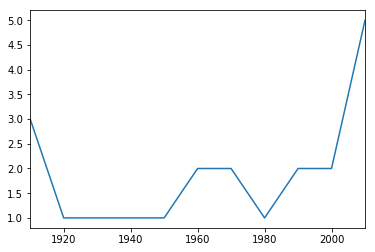

In [32]:
t = titles[titles.title == "Hamlet"]
t = t.year // 10 * 10
t = t.value_counts()
t.sort_index().plot()

### Plot the number of "Rustler" characters in each decade of the history of film.

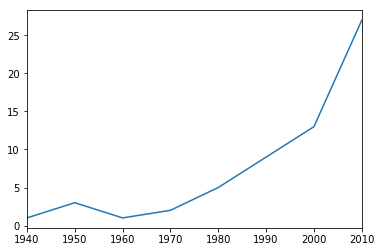

In [34]:
t = cast[cast.character == "Rustler"]
t = t.year // 10 * 10
t = t.value_counts()
t.sort_index().plot()

### Plot the number of "Hamlet" characters each decade.

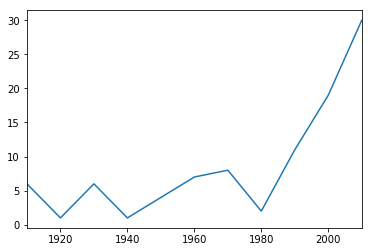

In [40]:
t = cast[cast.character == 'Hamlet']
t = t.year // 10 * 10
t = t.value_counts()
t.sort_index().plot()

### What are the 11 most common character names in movie history?

In [42]:
t = cast.character
t = t.value_counts()
t[0:10]

Himself        20689
Dancer         12229
Extra          11628
Reporter        8317
Doctor          7571
Student         7493
Party Guest     7009
Policeman       6975
Nurse           6802
Bartender       6728
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [44]:
t = cast[cast.character == 'Herself']
t = t.name.value_counts()
t[0:10]

Queen Elizabeth II    11
Joyce Brothers         9
Laura (II) M?gica      9
Margaret Thatcher      9
Mary Jo Pehl           9
Marina Revilla         8
In?s J. Southern       8
Marta Berrocal         8
Estrella Borja         8
Elena Santisteban      7
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [45]:
t = cast[cast.character == 'Himself']
t = t.name.value_counts()
t[0:10]

Adolf Hitler          100
Richard Nixon          46
Ronald Reagan          40
John F. Kennedy        36
George W. Bush         24
Winston Churchill      23
Ron Jeremy             23
Martin Luther King     22
Benito Mussolini       22
Bill Clinton           22
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [50]:
c = cast[cast.year == 1945]
c.name.value_counts()[0:10]

Emmett Vogan        39
Sam (II) Harris     32
Bess Flowers        29
Harold Miller       29
Frank O'Connor      27
Nolan Leary         27
Franklyn Farnum     26
Larry Steers        25
Charles Sullivan    24
Pierre Watkin       24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [52]:
cast[cast.year == 1985].name.value_counts()[0:10]


Mammootty        22
Shakti Kapoor    21
Sukumari         20
Mohanlal         15
Lou Scheimer     15
Raj Babbar       15
Aruna Irani      15
Rajesh Khanna    13
Asrani           13
Om Shivpuri      13
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

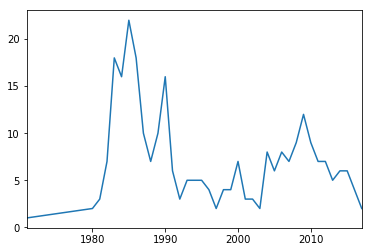

In [58]:
c = cast[cast.name == 'Mammootty']
c.year.value_counts().sort_index().plot()


### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [67]:
c = cast[cast.character.str.startswith('Patron in')]
c = c.character.value_counts()
c[0:10]

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Coffee Shop            2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [71]:
c = cast[cast.character.str.startswith('Science')]
c = c.character.value_counts()
c.head(10)

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Promo Cadet      5
Science Fair Judge       5
Science Club Member      5
Science Kid              5
Science Reporter         5
Science Fair Kid         4
Science                  4
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

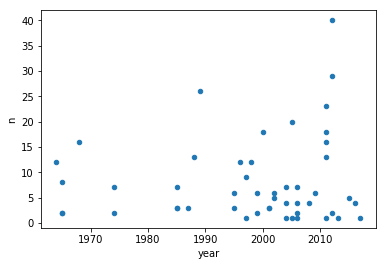

In [72]:
c = cast[cast.name == 'Judi Dench']
c.plot(x = 'year', y = 'n', kind = 'scatter')

### Plot the n-values of Cary Grant's roles through his career.

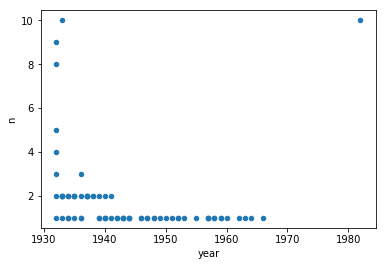

In [73]:
c = cast[cast.name == 'Cary Grant']
c.plot(x = 'year', y = 'n', kind = 'scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

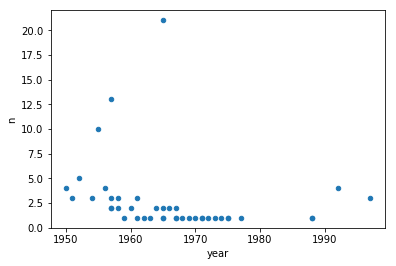

In [74]:
c = cast[cast.name == 'Sidney Poitier']
c.plot(x = 'year', y = 'n', kind = 'scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [79]:
c = cast[(cast.year >=1950) & (cast.year < 1960) & (cast.n == 1)]
c.type.value_counts()

actor      6687
actress    3004
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [80]:
c = cast[(cast.year >=1950) & (cast.year < 1960) & (cast.n == 2)]
c.type.value_counts()

actor      4620
actress    4602
Name: type, dtype: int64